In [1]:
import pandas as pd #  Loading the data, data wrangling and manipulation, feature engineering.
import numpy as np
import scipy.stats as scipy # Libraries for classifiers, model evaluation, metrics, cross-validation
import matplotlib.pyplot as plt # Data visualization
import urllib.request
import sys
from __future__ import division
from IPython.display import HTML
%matplotlib inline

In [59]:
%%HTML

<h1 align="center"> FOOTBALL 369 : The Future is Today </h1>
<div style="width:100%;height:0;padding-bottom:63%;position:relative;"><iframe src="https://giphy.com/embed/1msyFvFnk3Nw0SDf0V" width="100%" height="100%" style="position:absolute" frameBorder="0" class="giphy-embed" allowFullScreen></iframe></div><p><a href="https://giphy.com/gifs/football369-1msyFvFnk3Nw0SDf0V">via GIPHY</a></p>

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<b>Short Keys to results data:</b>

Div = League Division<br>
Date = Match Date (dd/mm/yy)<br>
HomeTeam = Home Team<br>
AwayTeam = Away Team <br>
FTHG = Full Time Home Team Goals<br>
FTAG = Full Time Away Team Goals<br>
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>
HTHG = Half Time Home Team Goals<br>
HTAG = Half Time Away Team Goals<br>
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)<br>

Match Statistics (where available)
Attendance = Crowd Attendance<br>
Referee = Match Referee<br>
HS = Home Team Shots<br>
AS = Away Team Shots<br>
HST = Home Team Shots on Target<br>
AST = Away Team Shots on Target<br>
HHW = Home Team Hit Woodwork<br>
AHW = Away Team Hit Woodwork<br>
HC = Home Team Corners<br>
AC = Away Team Corners<br>
HF = Home Team Fouls Committed<br>
AF = Away Team Fouls Committed<br>
HO = Home Team Offsides<br>
AO = Away Team Offsides<br>
HY = Home Team Yellow Cards<br>
AY = Away Team Yellow Cards<br>
HR = Home Team Red Cards<br>
AR = Away Team Red Cards<br>
HBP = Home Team Bookings Points (10 = yellow, 25 = red)<br>
ABP = Away Team Bookings Points (10 = yellow, 25 = red)<br>

### Load the data

In [4]:
#testfile = urllib.URLopener()
testfile = urllib.request.URLopener()
testfile.retrieve("http://www.football-data.co.uk/mmz4281/1617/E0.csv", "./Data/England/E0_16.csv")




('./Data/England/E0_16.csv', <http.client.HTTPMessage at 0x20ea3d56320>)

In [5]:
df = pd.read_csv("./Data/England/E0_16.csv")

In [6]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Here i'm cleaning the unwanted fields from the datasheet since i dont need it for prediction

In [7]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.iloc[:,23:]

#res_16 = df.ix[:,:23]  
# res_14 = df_14.ix[:,:23]
# res_14  =res_14.drop(['Div','Date'],axis=1)
#table_features = df.ix[:,:7]
#bet_16 = df.ix[:,23:]


In [8]:
res_16.head()
feature_table = df.iloc[:,:23]

#feature_table = df.ix[:,:23]

In [9]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,Liverpool,Middlesbrough,3,0,H,1,0,H,M Atkinson,25,...,10,3,13,8,3,3,0,1,0,0
376,Man United,Crystal Palace,2,0,H,2,0,H,A Taylor,9,...,2,1,16,10,3,6,2,0,0,0
377,Southampton,Stoke,0,1,A,0,0,D,L Probert,14,...,6,3,12,10,4,10,2,4,0,0
378,Swansea,West Brom,2,1,H,0,1,A,M Dean,12,...,2,5,8,10,7,4,1,1,0,0
379,Watford,Man City,0,5,A,0,4,A,J Moss,6,...,3,9,12,10,4,5,1,0,0,0


In [10]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [11]:
res_16.shape[0]

380

In [12]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print ("Average number of goals at home",avg_home_scored_16);
print ("Average number of goals away", avg_away_scored_16)
print ("Average number of goals conceded at home",avg_home_conceded_16);
print ("Average number of goals conceded away",avg_away_conceded_16);

Average number of goals at home 1.5973684210526315
Average number of goals away 1.2026315789473685
Average number of goals conceded at home 1.2026315789473685
Average number of goals conceded away 1.5973684210526315


In [13]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [14]:
# list(res_home)[0]

In [15]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,39,38,NaN,NaN,16,28,NaN,NaN
1,Bournemouth,35,20,NaN,NaN,29,38,NaN,NaN
2,Burnley,26,13,NaN,NaN,20,35,NaN,NaN
3,Chelsea,55,30,NaN,NaN,17,16,NaN,NaN
4,Crystal Palace,24,26,NaN,NaN,25,38,NaN,NaN
5,Everton,42,20,NaN,NaN,16,28,NaN,NaN
6,Hull,28,9,NaN,NaN,35,45,NaN,NaN
7,Leicester,31,17,NaN,NaN,25,38,NaN,NaN
8,Liverpool,45,33,NaN,NaN,18,24,NaN,NaN
9,Man City,37,43,NaN,NaN,17,22,NaN,NaN


In [16]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [17]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,39,38,1.285008,1.663020,16,28,0.700219,0.922570
1,Bournemouth,35,20,1.153213,0.875274,29,38,1.269147,1.252059
2,Burnley,26,13,0.856672,0.568928,20,35,0.875274,1.153213
3,Chelsea,55,30,1.812191,1.312910,17,16,0.743982,0.527183
4,Crystal Palace,24,26,0.790774,1.137856,25,38,1.094092,1.252059
5,Everton,42,20,1.383855,0.875274,16,28,0.700219,0.922570
6,Hull,28,9,0.922570,0.393873,35,45,1.531729,1.482702
7,Leicester,31,17,1.021417,0.743982,25,38,1.094092,1.252059
8,Liverpool,45,33,1.482702,1.444201,18,24,0.787746,0.790774
9,Man City,37,43,1.219110,1.881838,17,22,0.743982,0.724876


In [18]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,27,18,0.889621,0.787746,34,36,1.487965,1.186161


In [19]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [20]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3,9,0.856672,0.875274,0.787746,1.186161
1,Crystal Palace,West Brom,A,4,3,0.790774,1.094092,0.700219,0.955519
2,Everton,Tottenham,D,6,4,1.383855,0.700219,1.706783,0.560132
3,Hull,Leicester,H,5,5,0.922570,1.531729,0.743982,1.252059
4,Man City,Sunderland,H,4,3,1.219110,0.743982,0.568928,1.153213
5,Middlesbrough,Stoke,D,2,1,0.560132,1.006565,0.743982,1.054366
6,Southampton,Watford,D,6,1,0.560132,0.919037,0.656455,1.285008
7,Arsenal,Liverpool,A,5,7,1.285008,0.700219,1.444201,0.790774
8,Bournemouth,Man United,A,3,7,1.153213,1.269147,1.225383,0.560132
9,Chelsea,West Ham,H,6,3,1.812191,0.743982,1.225383,1.087315


In [21]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [22]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [23]:
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
370,Arsenal,Everton,H,9,7,1.285008,0.700219,0.875274,0.922570,1
371,Burnley,West Ham,A,1,4,0.856672,0.875274,1.225383,1.087315,-1
372,Chelsea,Sunderland,H,8,3,1.812191,0.743982,0.568928,1.153213,1
373,Hull,Tottenham,A,4,14,0.922570,1.531729,1.706783,0.560132,-1
374,Leicester,Bournemouth,D,5,4,1.021417,1.094092,0.875274,1.252059,0
375,Liverpool,Middlesbrough,H,10,3,1.482702,0.787746,0.437637,0.988468,1
376,Man United,Crystal Palace,H,2,1,0.856672,0.525164,1.137856,1.252059,1
377,Southampton,Stoke,A,6,3,0.560132,0.919037,0.743982,1.054366,-1
378,Swansea,West Brom,H,2,5,0.889621,1.487965,0.700219,0.955519,1
379,Watford,Man City,A,3,9,0.823723,1.269147,1.881838,0.724876,-1


In [24]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC
import sys

In [26]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [27]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print (scores);
print (scores.mean());

[ 0.53846154  0.53846154  0.51282051  0.43589744  0.47368421  0.55263158
  0.60526316  0.64864865  0.56756757  0.63888889]
0.551232507811


In [28]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print (scores);
print (scores.mean());

[ 0.48717949  0.56410256  0.53846154  0.51282051  0.52631579  0.63157895
  0.63157895  0.54054054  0.51351351  0.52777778]
0.547386961861


In [29]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print (scores);
print (scores.mean());

[ 0.61538462  0.61538462  0.58974359  0.61538462  0.71052632  0.60526316
  0.71052632  0.56756757  0.62162162  0.66666667]
0.631806908123


In [30]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print (scores);
print (scores.mean());

[ 0.48717949  0.58974359  0.51282051  0.69230769  0.57894737  0.63157895
  0.76315789  0.64864865  0.67567568  0.63888889]
0.621894870579


## Adding Recent Performance

In [31]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [32]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [33]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Chelsea','Man City','D',0,0,0,0,0,0],
                             ['Liverpool','Bournemouth','D',0,0,0,0,0,0],
                             ['Southampton','Crystal Palace','D',0,0,0,0,0,0],
                             ['Hull','Middlesbrough','D',0,0,0,0,0,0],
                             ['Arsenal','West Ham','D',0,0,0,0,0,0],
                             ['Swansea','Tottenham','D',0,0,0,0,0,0],
                             ['Man United','Everton','D',0,0,0,0,0,0],
                             ['Leicester','Sunderland','D',0,0,0,0,0,0],
                             ['Burnley','Stoke','D',0,0,0,0,0,0],
                             ['Watford','West Brom','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [34]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(390, 9)

In [35]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [36]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
389,Chelsea,Man City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
388,Liverpool,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
387,Southampton,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
386,Hull,Middlesbrough,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
385,Arsenal,West Ham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
384,Swansea,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
383,Man United,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
382,Leicester,Sunderland,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
381,Burnley,Stoke,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
380,Watford,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [38]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

C:\Users\AnverMAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\AnverMAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [40]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [41]:
# num_games decides the train-test split
print (feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(390, 19)


380

In [42]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [43]:
### Try predictions here too.

# Adding home advantage

In [44]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [45]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set(240 fixtures) for validation.''' 
num_games = feat_table.shape[0]-10
print (num_games)
v_split = 20
n_games = num_games - v_split

380


In [46]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [47]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
380,0.4375,-0.0625,3.8125,0.823723,1.269147,0.656455,1.285008
381,0.7500,0.1250,3.3750,0.856672,0.875274,0.568928,1.153213
382,-0.6875,0.1875,4.0000,1.021417,1.094092,0.743982,1.252059
383,-0.0625,0.0625,2.7500,0.856672,0.525164,1.225383,0.560132
384,0.7500,-0.5625,2.1250,0.889621,1.487965,0.787746,1.186161
385,1.3750,0.5000,3.0625,1.285008,0.700219,1.663020,0.922570
386,-0.1875,-0.1250,3.1875,0.922570,1.531729,0.393873,1.482702
387,-0.2500,-0.1250,2.8750,0.560132,0.919037,1.050328,0.889621
388,-0.5625,0.1250,1.6250,1.482702,0.787746,1.444201,0.790774
389,0.1875,-0.1250,0.6250,1.812191,0.743982,1.312910,0.527183


In [48]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [49]:
#KNN
plot_scores_knn = []
for b in range(1,50): #xrange is changed to range in python 3
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


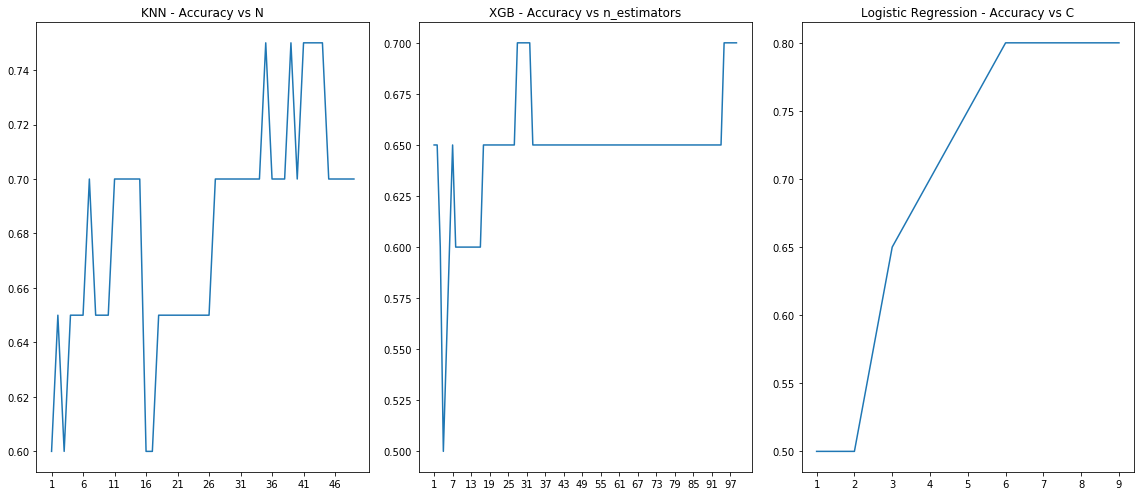

In [50]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [51]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print (max_knn_n, max_knn_ind)
print (max_XGB_e, max_XGB_ind)
print (max_logreg_c, max_logreg_ind)


0.75 34
0.7 27
0.8 5


In [52]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [53]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [54]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [55]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
380,Watford,West Brom,1,1,1
381,Burnley,Stoke,1,1,1
382,Leicester,Sunderland,1,1,1
383,Man United,Everton,1,1,1
384,Swansea,Tottenham,-1,-1,-1
385,Arsenal,West Ham,1,1,1
386,Hull,Middlesbrough,1,1,-1
387,Southampton,Crystal Palace,-1,-1,-1
388,Liverpool,Bournemouth,1,1,1
389,Chelsea,Man City,1,1,1


In [56]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [57]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [58]:
print (max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.75 0.7 0.8


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
380,Watford,West Brom,H,H,H
381,Burnley,Stoke,H,H,H
382,Leicester,Sunderland,H,H,H
383,Man United,Everton,H,H,H
384,Swansea,Tottenham,A,A,A
385,Arsenal,West Ham,H,H,H
386,Hull,Middlesbrough,H,H,A
387,Southampton,Crystal Palace,A,A,A
388,Liverpool,Bournemouth,H,H,H
389,Chelsea,Man City,H,H,H
